In [1]:
from nltk import word_tokenize, ngrams
from collections import Counter

In [2]:
import codecs
fnames = ['./text_data/shakespeare/1786.txt.utf-8', './text_data/shakespeare/1793.txt.utf-8',
         './text_data/sawyer/74-0.txt', './text_data/sawyer/76-0.txt',
         './text_data/dickens/pg19337.txt', './text_data/dickens/pg730.txt']
groups = ['William Shakespeare - As You Like It', 'William Shakespeare - Othello', 
          'Mark Twain - The Adventures of Tom Sawyer', 'Mark Twain - The Adventures of Huckleberry Finn',
          'Charles Dickens - A Christmas Carol', 'Charles Dickens - Oliver Twist']
# term_counts = []
# for fname in fnames:
#     with codecs.open(fname, 'r', encoding='utf8') as f:
#         txt = f.read()
#     txt = txt.lower()
#     tokens = word_tokenize(txt)
#     ng = ngrams(tokens, 1)
#     term_counts.append(Counter(ng))

In [3]:
# term_count_dict = {}
# group_map = {}
# for i, fname in enumerate(fnames):
#     term_count_dict[fname] = term_counts[i]
#     group_map[fname] = groups[i]

In [4]:
term_count_dict = {}
group_map = {}
for i, fname in enumerate(fnames):
    with codecs.open(fname, 'r', encoding='utf8') as f:
        txt = f.read()
    txt = txt.lower()
    tokens = word_tokenize(txt)
    ng = ngrams(tokens, 1)
    term_counts = Counter(ng)
    term_count_dict[fname] = term_counts
    group_map[fname] = groups[i]

In [5]:
from jargon_distance import JargonDistance

In [8]:
j = JargonDistance(term_counts=term_count_dict, group_map=group_map)
j.calculate_jargon_distance()

In [9]:
from jargon_distance.analysis import JargonDistanceAnalysis

In [10]:
ja = JargonDistanceAnalysis.from_object(j)

In [11]:
ja.symmetrize_graph()

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [14]:
# ja.get_linkage(method='average')

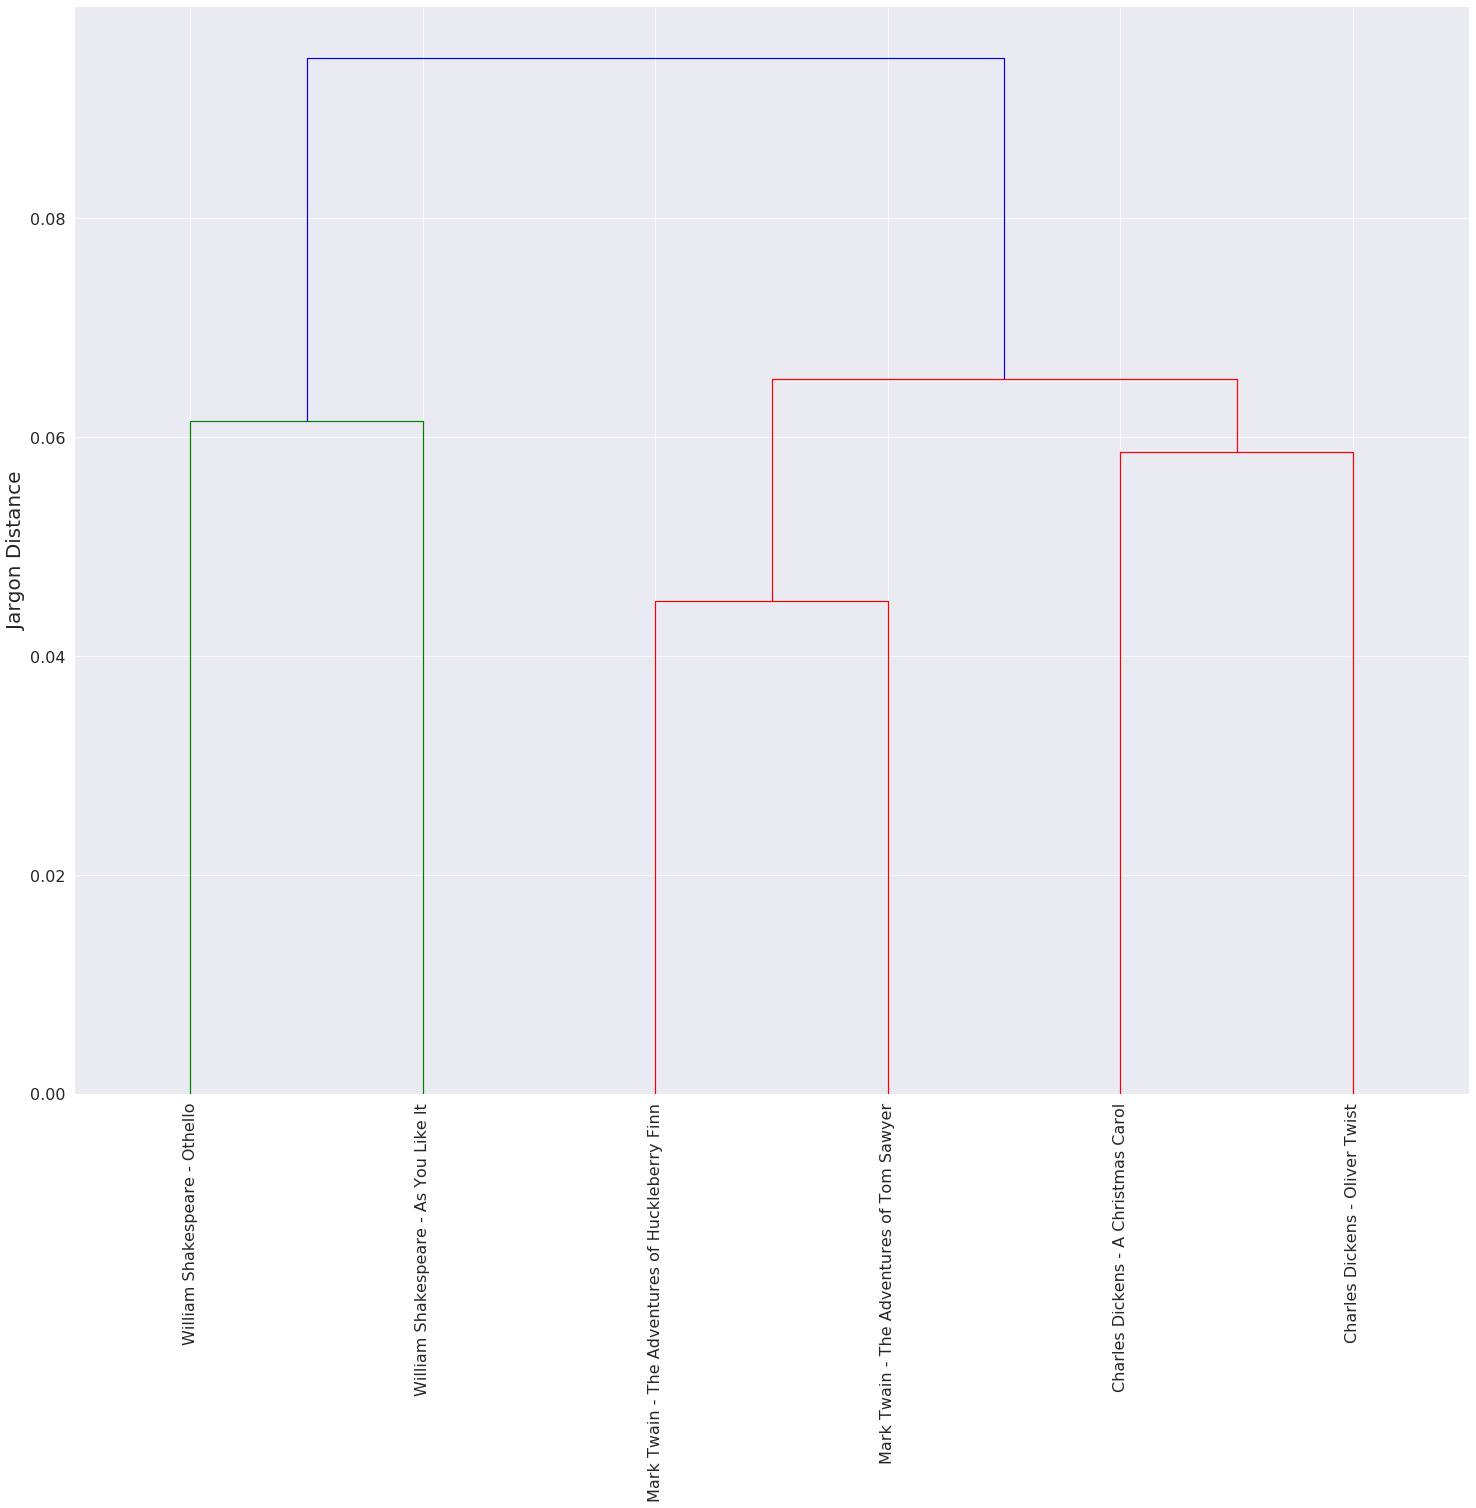

In [16]:
ja.make_dendrogram(labels=list(ja.G_sym.nodes()), show_plot=True, rotation=90.)

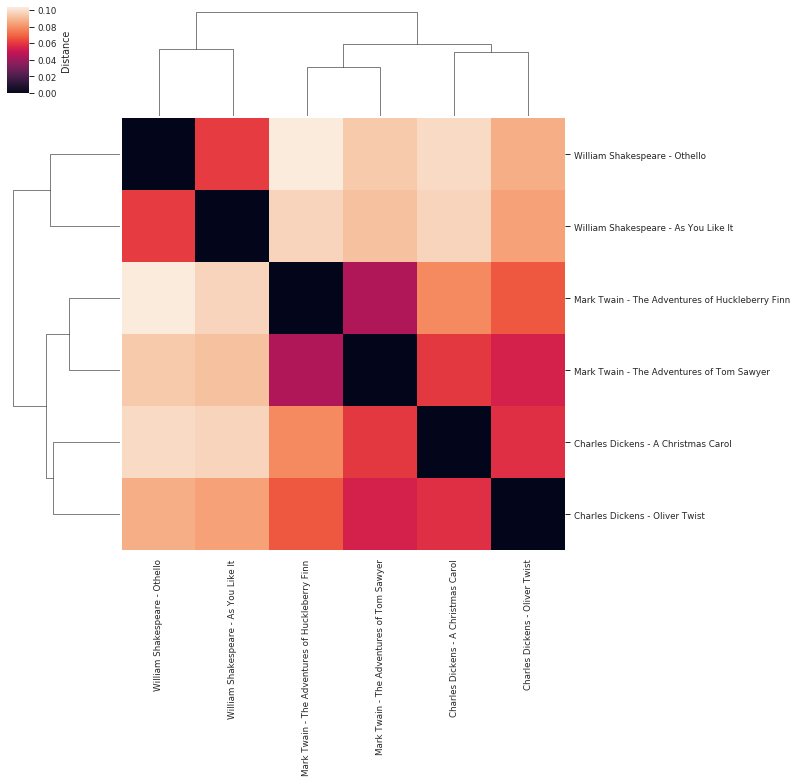

In [17]:
cm = ja.make_sns_clustermap(labels=ja.G_sym.nodes())
# plt.show()
# fig.show()